<a href="https://colab.research.google.com/github/carlosmanm/Data_Science/blob/main/Models_Algorithms/Machine_Learning/Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn # redes neuronales
import torch.optim as optim 

import matplotlib.pyplot as plt
import pandas as pd

# **Regresion Lineal**

En ML para regresion:

y -> Label -> Lo que estamos prediciendo y es variable de salida. 

x -> Feature -> Una variable de entrada

bedrooms, sq- feet, neighborhood -> feature

sales price -> label

Modelo = define relaciones entre labes y features.

Training = aprendizaje -- varias iteraciones para reducir el loss.

Inference = usar el modelo para realizar predicciones.

 

En esta regresion podremos compararemos las unidades vendidas de automoviles explicadas por los precios

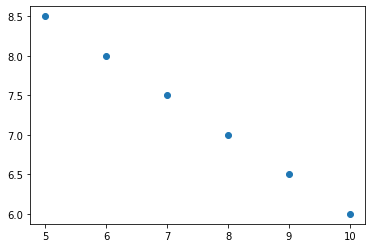

In [ ]:
cars_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7, 6.5, 6]

plt.scatter(cars_prices, units_sold)

Ahora de numpy pasamos a Torch

In [ ]:
prices_array = np.array(cars_prices).reshape(-1, 1)
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
units_array = np.array(units_sold).reshape(-1, 1)
units_array

array([[8.5],
       [8. ],
       [7.5],
       [7. ],
       [6.5],
       [6. ]])

In [ ]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float() # No necesita gradientes porque es mi target

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

Creamos el modelo

tensor(0.0178, grad_fn=<MseLossBackward>)


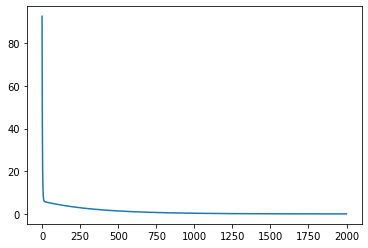

In [ ]:
model = nn.Linear(1,1)

loss_function  = nn.MSELoss() # Mean squared error

optimizer = optim.SGD(model.parameters(), lr=0.015)  # scholastic gradient descent   / lr = learning rate

losses = []

iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

In [ ]:
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7046]], grad_fn=<AddmmBackward>)

Con 4 numero de unidades vendidas el precio deberia ser 8.7

In [ ]:
x = torch.Tensor([[14.0]])
p = model(x)
p

tensor([[4.4655]], grad_fn=<AddmmBackward>)

## **Regresion Logistica**

Para una clasificacion binaria, nos apoyamos de una funcion mateamatica llamada Sigmoide. Si en caso de que la clasificacion tuviera mas parametros, hariamos uso de la funcion Softmax

A la regresión lineal también se le agrega el sigmoide que nos dará una probabilidad de salida y con ello resolvemos nuestro problema de pasar una regresión lineal a una regresión logística y debido a este cambio el MSE ya no será mi mejor forma de calcular el LOSS. Debe cambiar.

La aproximación intuitiva es castigar cuando el valor es 0 y la predicción resulta en 1 o viceversa. Esto se logra con el logaritmo porque nos permite modelarlo perfectamente y ahora nuestra función de pérdida o LOSS va a incluir logaritmos.

Para problemas de probabilidad, utilizamos una regresión logística
Para calcular el error(loss), nos basamos en la entropía pero el gradiente sigue siendo útil

In [ ]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3

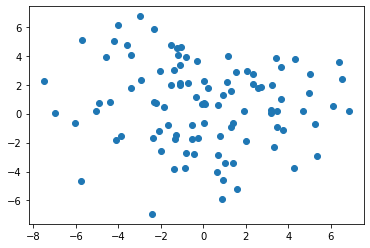

In [ ]:
plt.scatter(data[:,0], data[:,1]) 

In [ ]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))

In [ ]:
data[:h, :]= data[:h, :] + 3*np.ones((h, dimen))

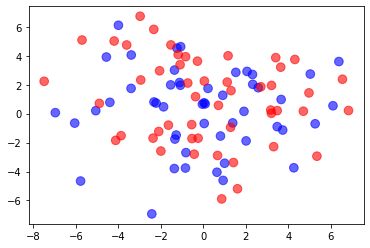

In [ ]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [ ]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.6836, grad_fn=<BinaryCrossEntropyBackward>)

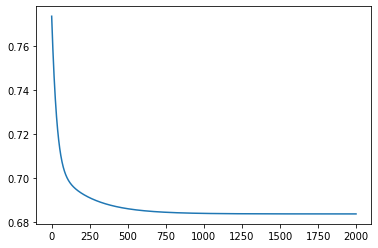

In [ ]:
# primero definimos la estructura del modelo sin datos

model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()  # definimos como se estructura nuestra loss function

optimizer = optim.SGD(model.parameters(), lr=0.01) # definimos como se estructura nuestra optimizacion la cual ocupara el modelo anteriormente definido

losses = [] # Aqui guardaremos la perdida. 

iterations = 2000 # el numero de iteraciones que ocuparemos

for i in range(iterations):
  result = model(x) # aqui indicamos que queremos que ese modelo ocupe x (el tensor de nuestra data)
  
  loss = loss_function(result, y) # Le indicamos a nuestra funcion ya definida que trabaje con nuestro target
  losses.append(loss.data) # Le pedimos que guarde la perdida del modelo, segun el target en esta variable. 
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses) # graficamos la perdida segun el numero de iteraciones
loss

In [ ]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


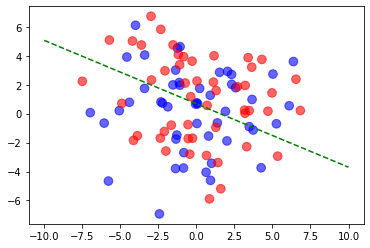

In [ ]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

# Eje X & eje Y

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')